In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Pre-processing

In [2]:
df = pd.read_csv('wine-reviews.csv')

In [3]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
df.shape

(129971, 14)

In [7]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


# Modeling

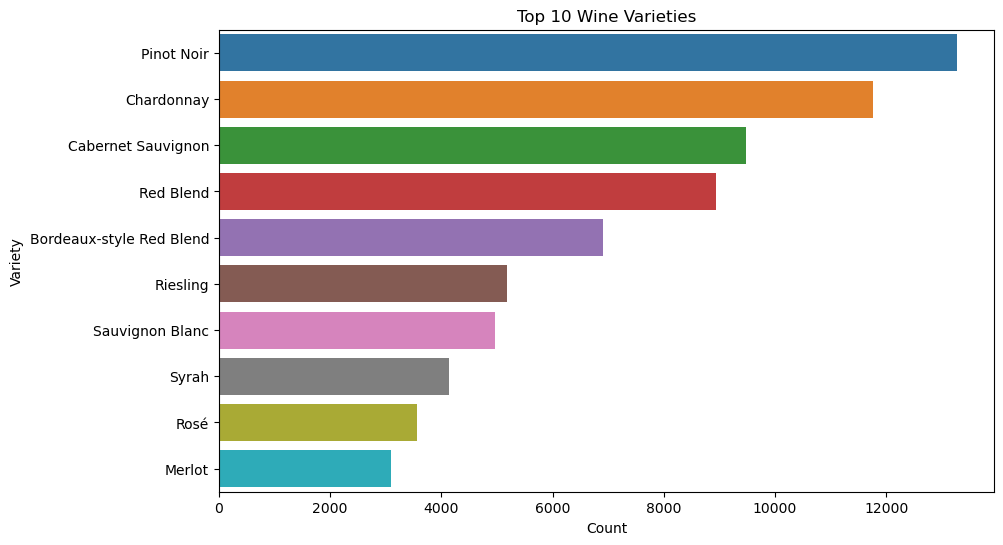

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y='variety', data=df, order=df['variety'].value_counts().index[:10])
plt.title('Top 10 Wine Varieties')
plt.xlabel('Count')
plt.ylabel('Variety')
plt.show()

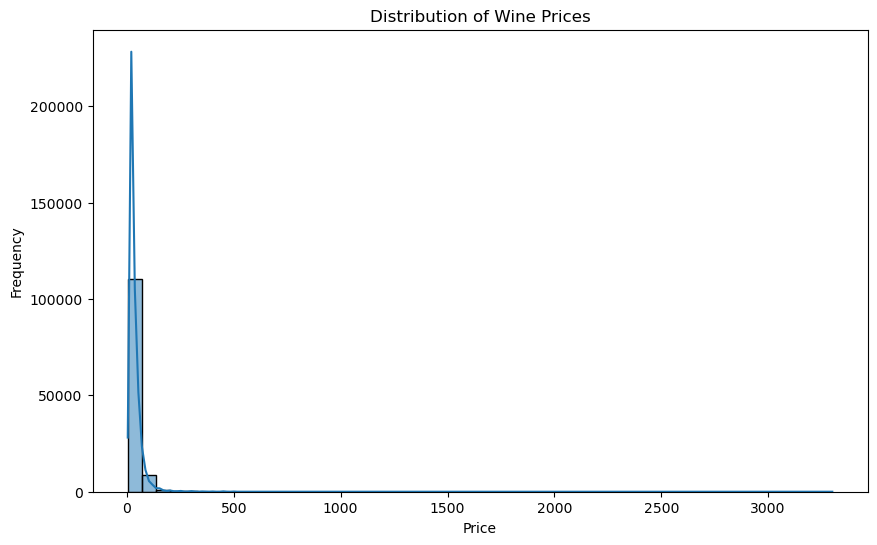

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'].dropna(), bins=50, kde=True)
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

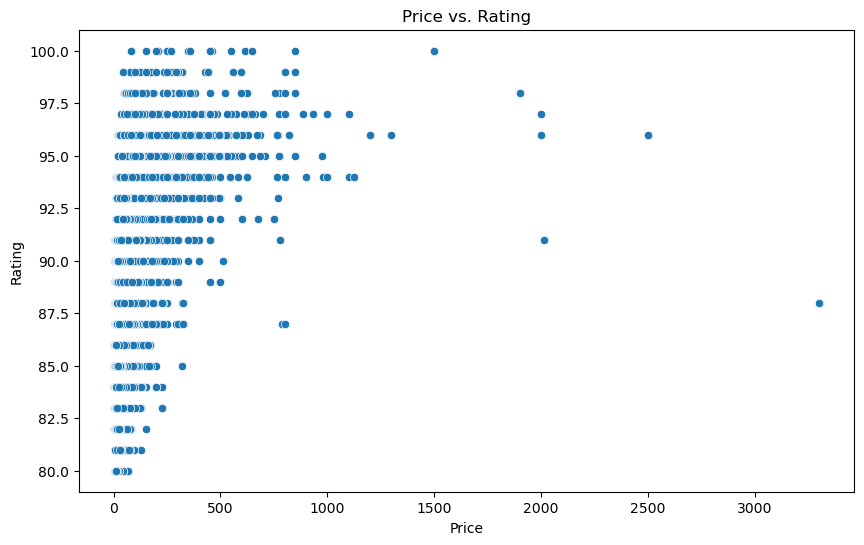

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', data=df)
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

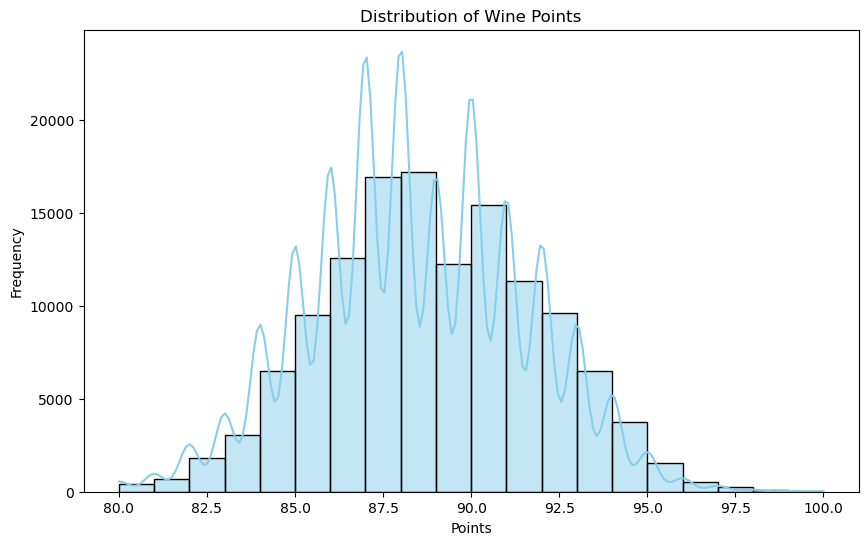

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['points'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

# Pre-Processing

In [15]:
df.dropna(inplace=True)

In [16]:
df = pd.get_dummies(df, columns=['variety', 'country'])

In [17]:
scaler = StandardScaler()
numerical_features = ['price', 'points']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [18]:
df.drop(columns=['Unnamed: 0', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle'], inplace=True)

# Clustering

In [19]:
# Scaling numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['points', 'price', 'title', 'winery'], axis=1))

# KMeans Clustering with explicit setting of n_init
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # 3 clusters for risk categories
kmeans.fit(scaled_features)

# Assign clusters to dataframe
df['Cluster'] = kmeans.labels_


In [20]:
cluster_stats = df.groupby('Cluster').agg({
    'points': ['mean', 'std'],
    'price': ['mean', 'std'],
    'title': 'count'
}).reset_index()

cluster_stats.columns = ['Cluster', 'Mean Points', 'Std Points', 'Mean Price', 'Std Price', 'Number of Wines']
print(cluster_stats)


   Cluster  Mean Points  Std Points  Mean Price  Std Price  Number of Wines
0        0    -0.253435    1.035054   -0.315158   0.460492             1114
1        1    -0.013523    0.994032    0.010156   1.027934            19595
2        2     0.326173    0.970682    0.090634   0.887384             1678


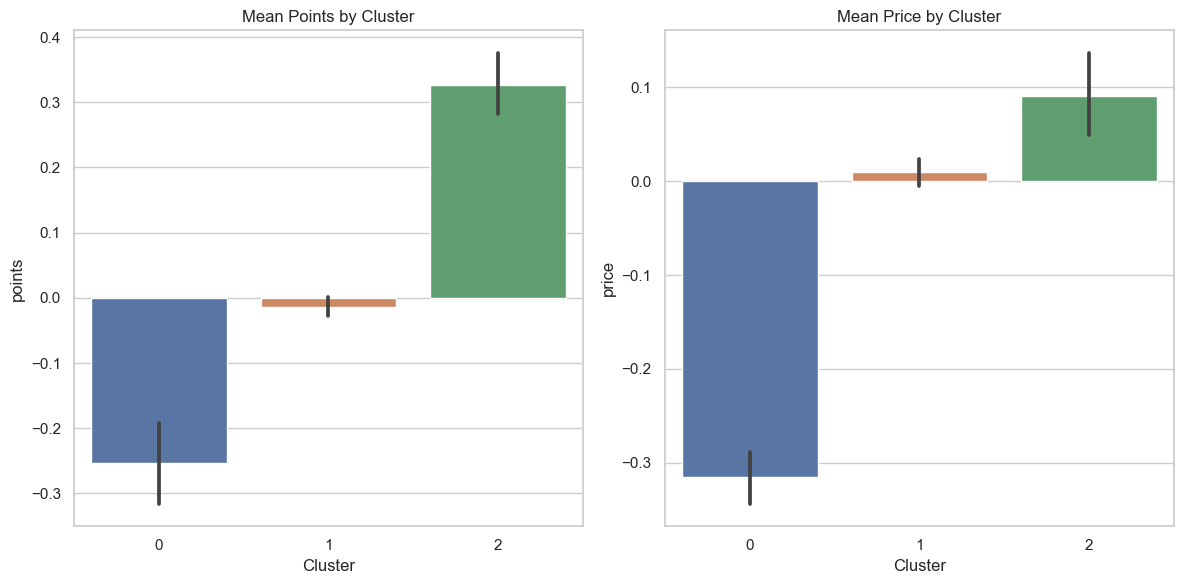

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Cluster', y='points', data=df)
plt.title('Mean Points by Cluster')
plt.subplot(1, 2, 2)
sns.barplot(x='Cluster', y='price', data=df)
plt.title('Mean Price by Cluster')

plt.tight_layout()
plt.show()


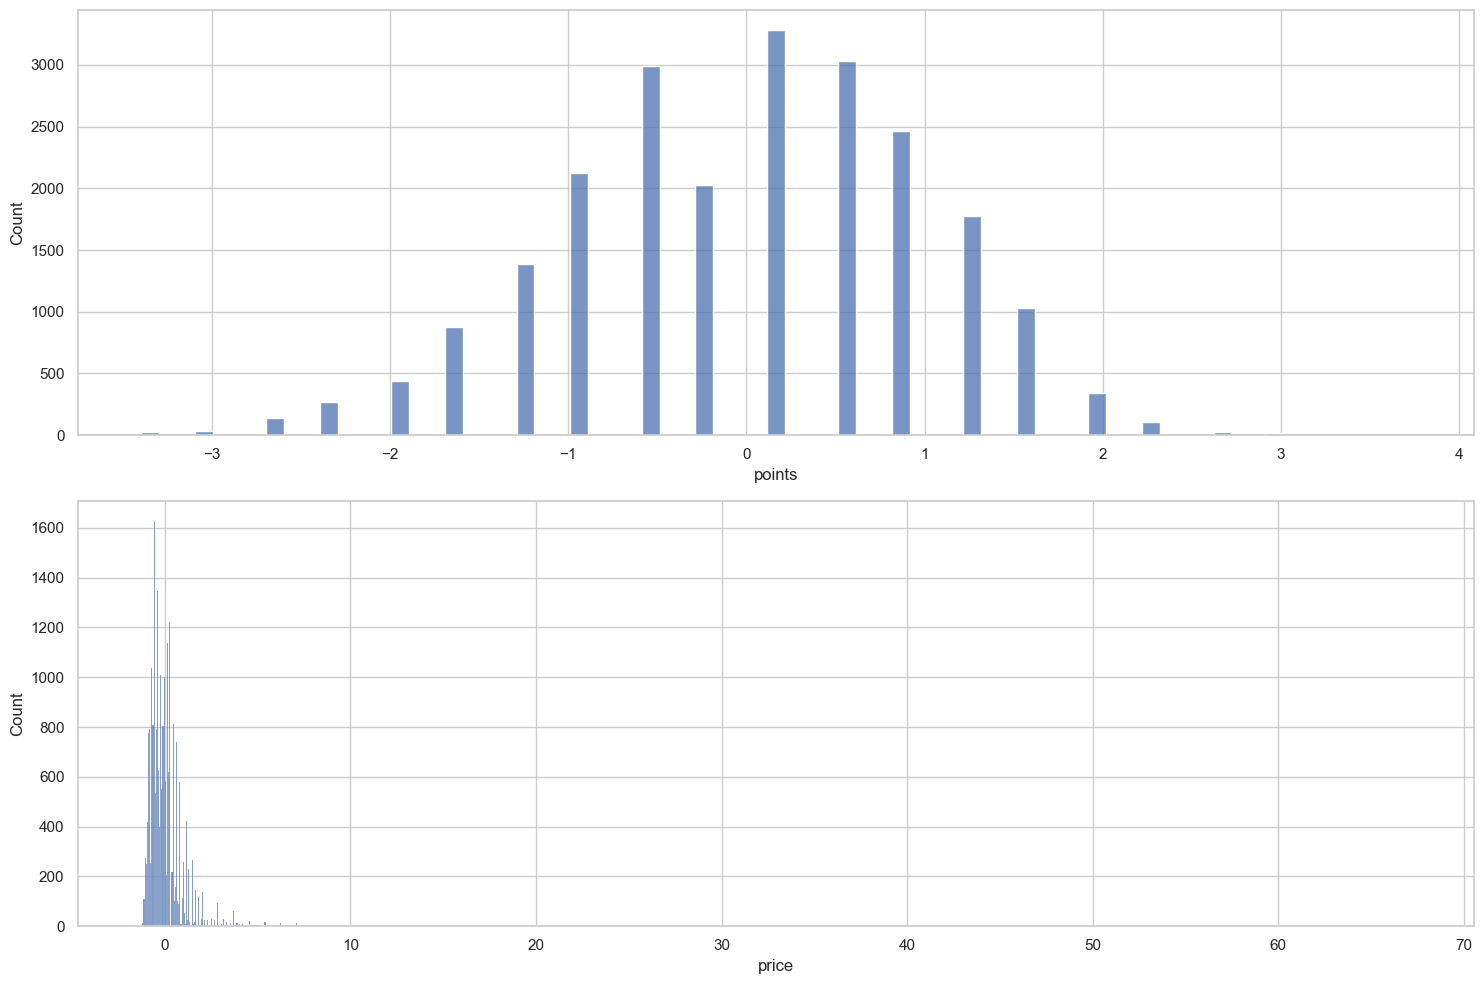

In [23]:
plt.figure(figsize=(15, 10))

variables = ['points', 'price']  
for i, var in enumerate(variables, 1):
    plt.subplot(2, 1, i)  
    sns.histplot(df, x=var)
    
plt.tight_layout()
plt.show()


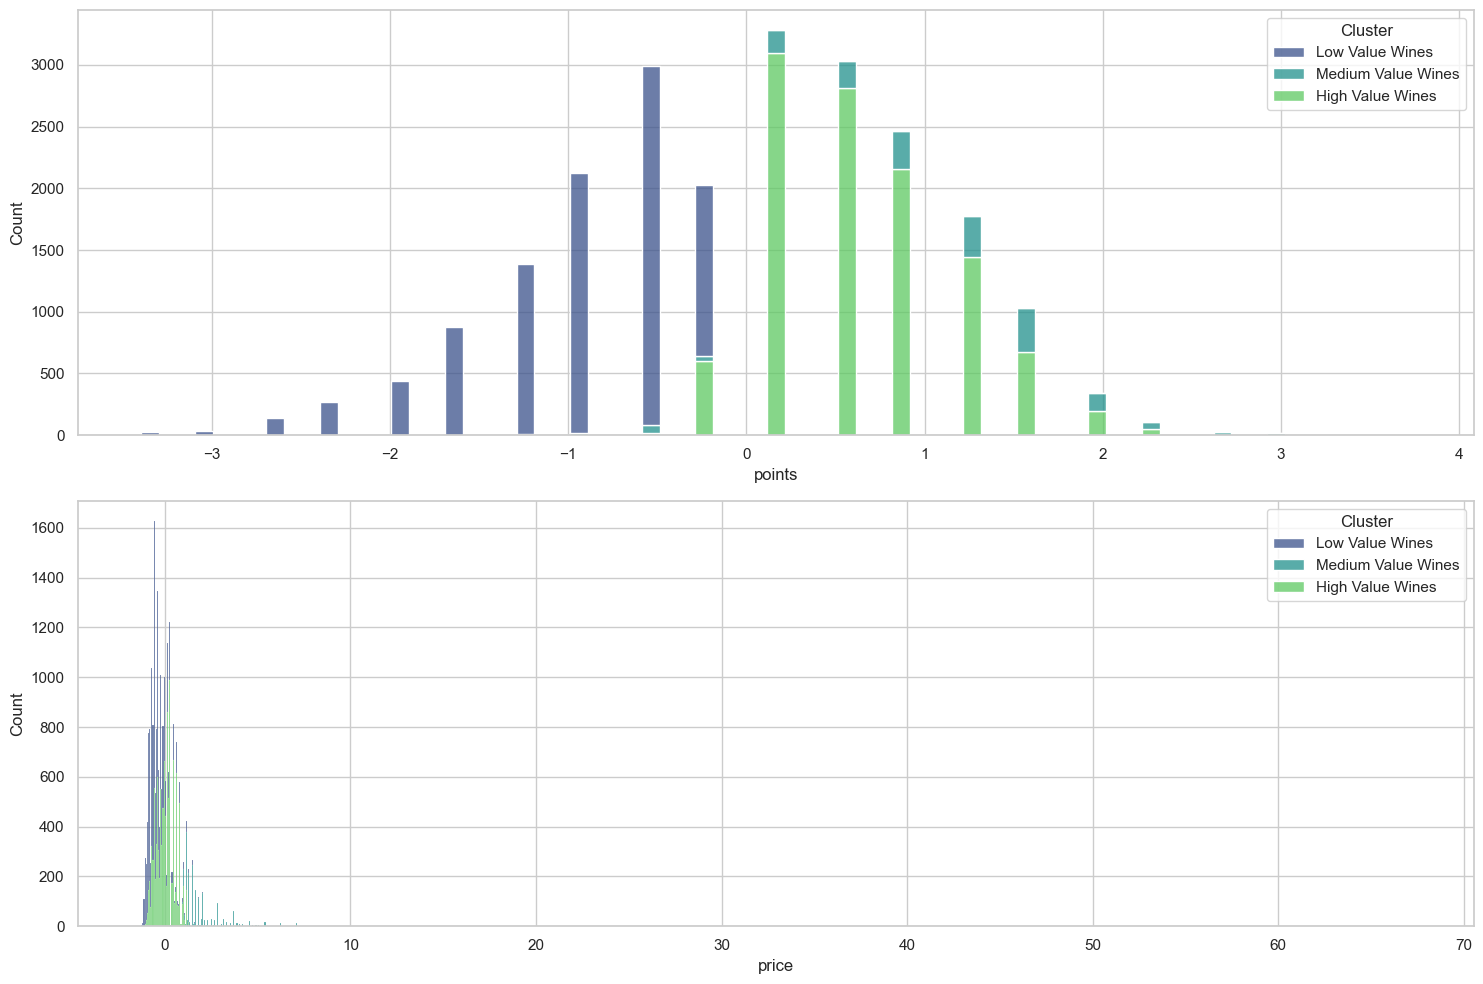

In [24]:
df.dropna(inplace=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['points', 'price']])  # Scale the numerical features

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # 3 clusters for wine categories
kmeans.fit(scaled_features)
clusters = kmeans.labels_
df['Cluster'] = clusters

# cluster names
cluster_names = {0: 'High Value Wines', 1: 'Medium Value Wines', 2: 'Low Value Wines'}
df['Cluster'] = df['Cluster'].map(cluster_names)

plt.figure(figsize=(15, 10))

variables = ['points', 'price']  
for i, var in enumerate(variables, 1):
    plt.subplot(2, 1, i)  
    sns.histplot(df, x=var, hue='Cluster', palette='viridis', multiple='stack')

plt.tight_layout()
plt.show()


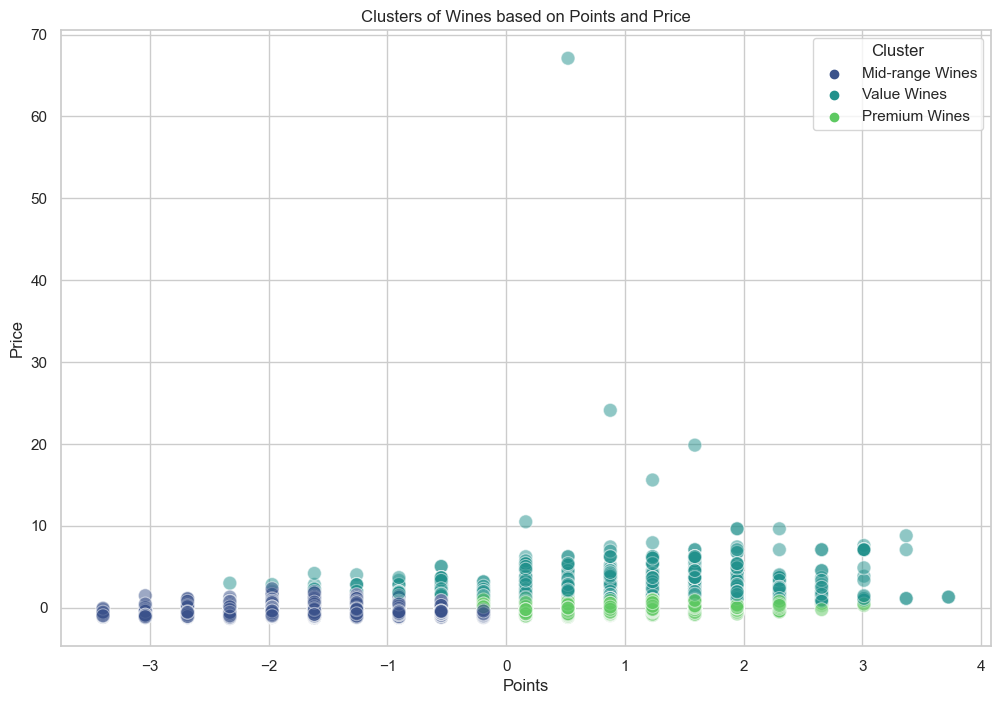

In [25]:
df.dropna(inplace=True)

X = df[['points', 'price']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_names = {0: 'Premium Wines', 1: 'Value Wines', 2: 'Mid-range Wines'}
df['Cluster'] = df['Cluster'].map(cluster_names)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='points', y='price', hue='Cluster', palette='viridis', alpha=0.5, s=100)
plt.title('Clusters of Wines based on Points and Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
